In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
start_dates = []
end_dates = []
for _ in range(2010,2018+1):
    start_date = str(_) + "-09-01"
    start_dates.append(start_date)
    end_date = str(_) + "-12-20"
    end_dates.append(end_date)
    
tickers_str = ["WMT","AMZN","EBAY","TGT","SPY"]
ticker = "SPY"
year = "2018"

In [3]:
start_date,end_date = year + "-01-01", str(int(year)+1) + "-01-31"
data = yf.download(ticker , start = start_date , end = end_date)
data['Daily_return']=data['Close']/data['Close'].shift(1)-1
data['Daily_return_pct'] = data['Close'].pct_change(1)
data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
# Cumulative Returns
data[ ticker] = np.cumsum(data['Daily_return'])

[*********************100%***********************]  1 of 1 completed


In [4]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Daily_return        float64
Daily_return_pct    float64
Daily_return_log    float64
SPY                 float64
dtype: object

In [25]:
def cumulative_return(year:int,tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers:
        start_date,end_date = str(int(year)-5) + "-01-01", year + "-12-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ticker] = np.cumsum(data['Daily_return'])
        data[ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

[*********************100%***********************]  1 of 1 completed


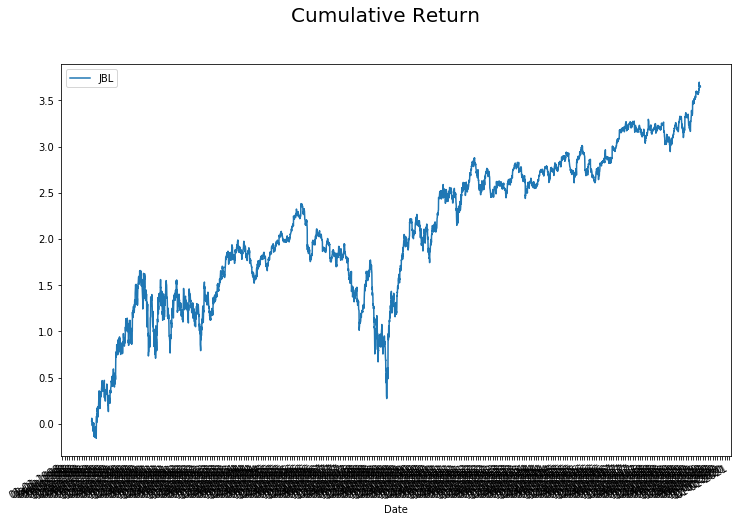

In [35]:
cumulative_return(2019, ['JBL'])

In [21]:
def cumulative_return_quarter(tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for year in range(2010, 2020):
        year = str(year)
        for ticker in tickers:
            start_date,end_date = year + "-01-01", year + "-12-31"
            data = yf.download(ticker , start = start_date , end = end_date)
            data['Daily_return']=data['Close']/data['Close'].shift(1)-1
            data['Daily_return_pct'] = data['Close'].pct_change(1)
            data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
            # Cumulative Returns
            data[ticker + year] = np.cumsum(data['Daily_return'])
            data[ticker + year][1:].plot() # skip first line
            print("{} {} {}".format(ticker,year, data[ticker + year][-1]))
            ret +=  data[ticker + year][-1]
    print(ret)
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

cumulative_return_quarter(['SPY'])

In [15]:
def bollinger_band(mean_window: int, std_dev_window: int, tickers: [str], start_year: int, end_year: int):
    import matplotlib.pyplot as plt
    %matplotlib inline
    for ticker in tickers:
        start_date, end_date = str(start_year) + "-01-01",  str(end_year) + "-12-31"
        df = yf.download(ticker , start = start_date , end = end_date)
        MA_col_name = str(mean_window) + '_MA_Close'
        std_dev_col_name = str(std_dev_window) + '_std_close'
        df[MA_col_name] = df['Close'].rolling(window=mean_window).mean()
        #calculating 20 days rolling standard devtaion
        df[std_dev_col_name] = df['Close'].rolling(window=std_dev_window).std()
        df['Upper'] = df[MA_col_name] + 2*df[std_dev_col_name]
        df['Lower'] = df[MA_col_name] - 2*df[std_dev_col_name]
        df[['Close',MA_col_name,'Upper','Lower']].plot(figsize=(10,5))
        plt.suptitle(ticker, fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


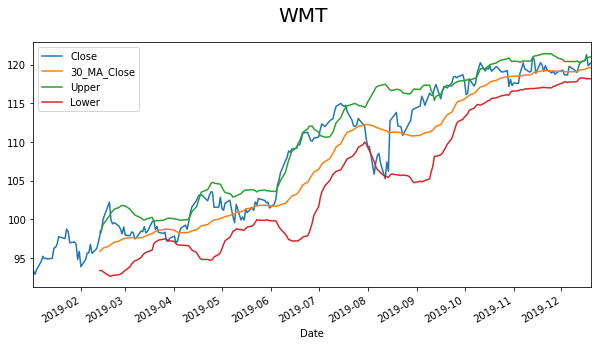

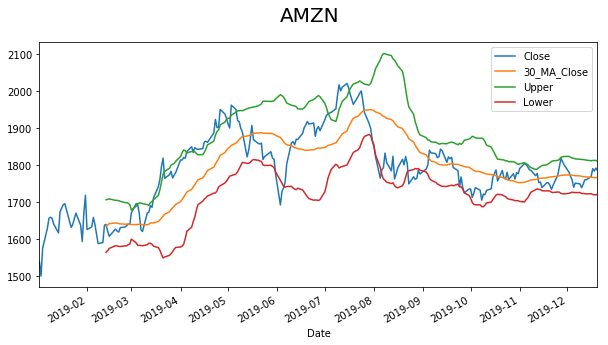

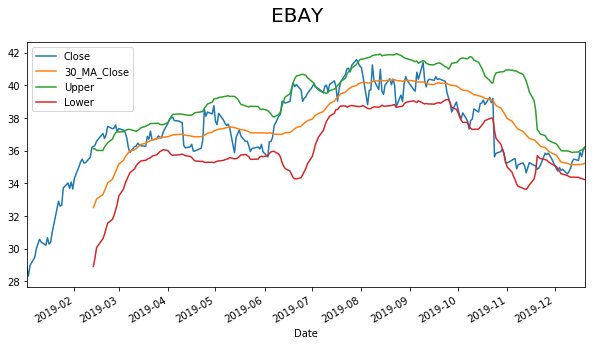

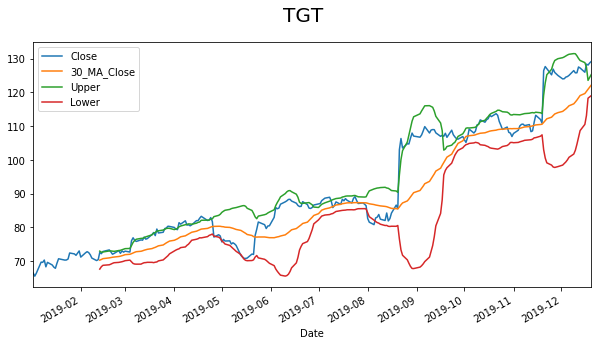

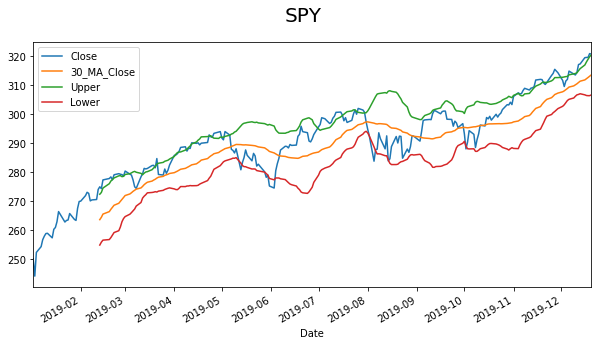

In [40]:
bollinger_band(30, 20, tickers_str,2019,2019)

In [44]:
def cumulative_return_adjusted(year:int,tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers_str:
        start_date,end_date = year + "-01-01", str(int(year)+1) + "-01-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        dividends = pd.DataFrame(yf.Ticker(ticker).dividends)
        print(dividends.head())
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ ticker] = np.cumsum(data['Daily_return'])
        data[ ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

https://aroussi.com/post/worlds-best-strategy
Analysis of the strategy:
1. Hold GLD (SPDR Gold Trust ETF) from December 20 of every year through February 20 of the following year, and during August.
2. The rest of the time hold SPLV (Invesco S&P 500 Low Volatility ETF)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

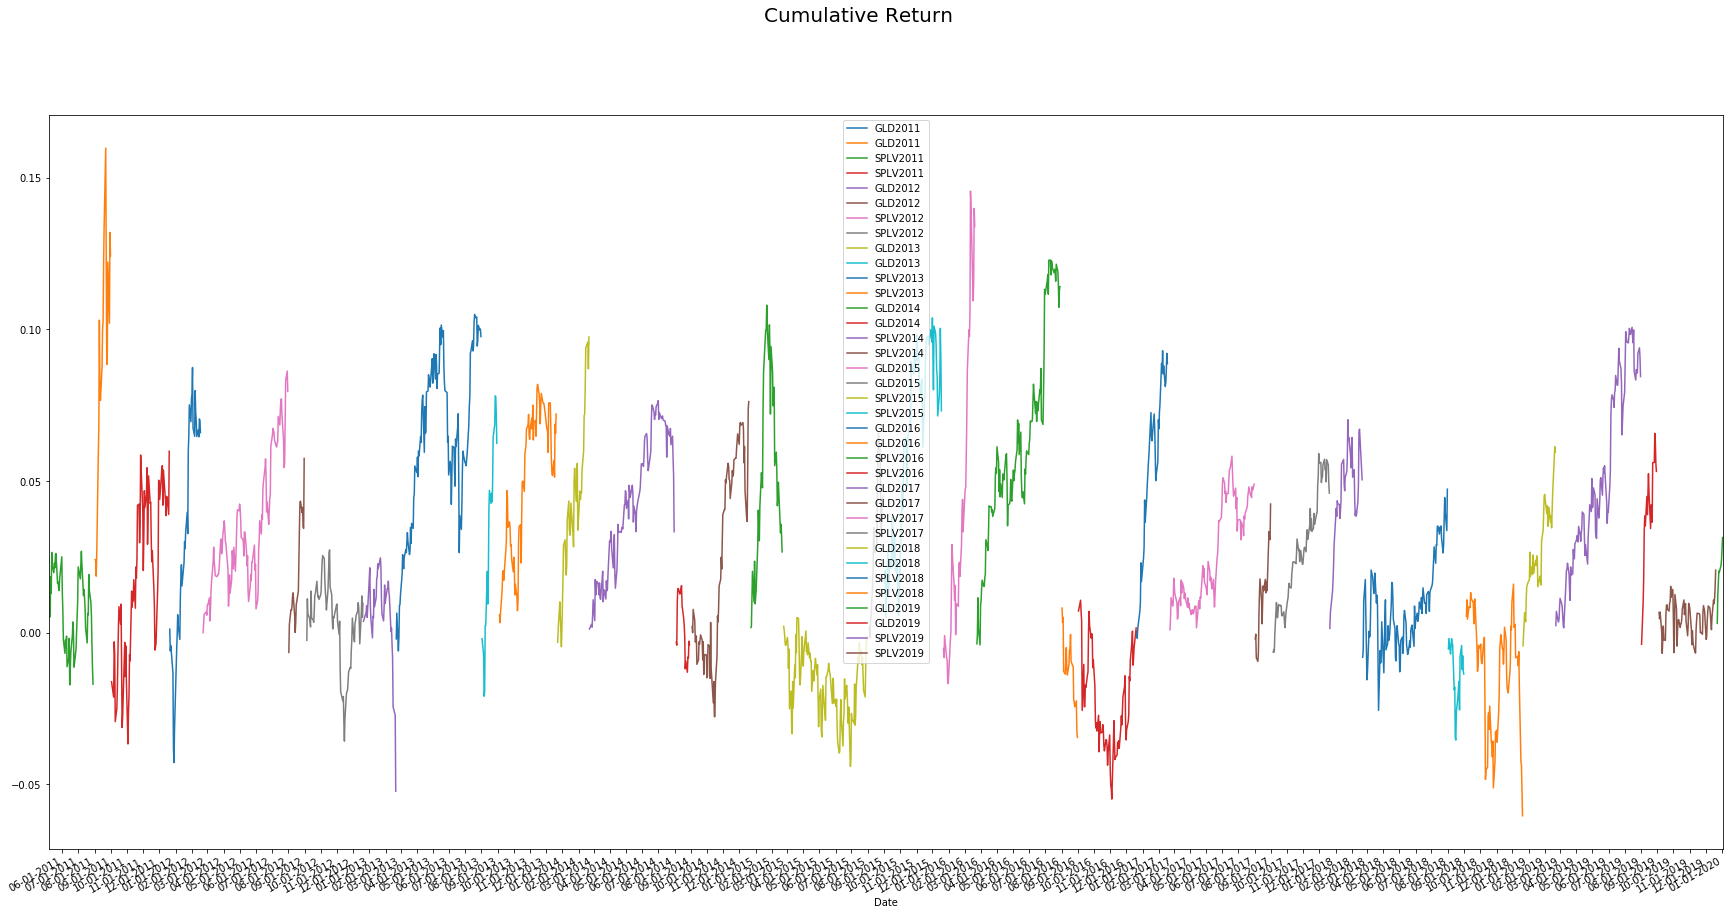

In [27]:
def cumulative_return_GLD_SPLV():
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for year in range(2011, 2020):
        year = str(year)
        # Buy GLD 12/20 / Sell 2-20
        GLD_start_date,GLD_end_date = year + "-12-20", str(int(year)+1) + "-02-20"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        # Buy GLD for August
        GLD_start_date,GLD_end_date = year + "-08-01", year + "-08-31"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-02-20", year + "-07-31"
        # Buy SPLV the rest of the time
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-09-01", year + "-12-20"
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        
    print(" Cumulative Returns for GLD/SPLV strategy: {} ".format(ret))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

cumulative_return_GLD_SPLV()

[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for SPLV: 0.9146314038072332 
[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for SPY: 1.0224494096561476 


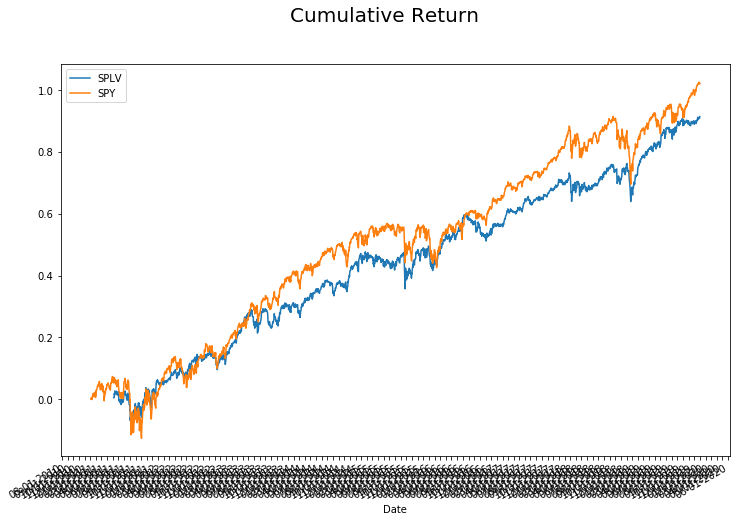

In [34]:
cumulative_return(2011, 2019 ,["SPLV","SPY"])

In [2]:
s = yf.download("GLD")

[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

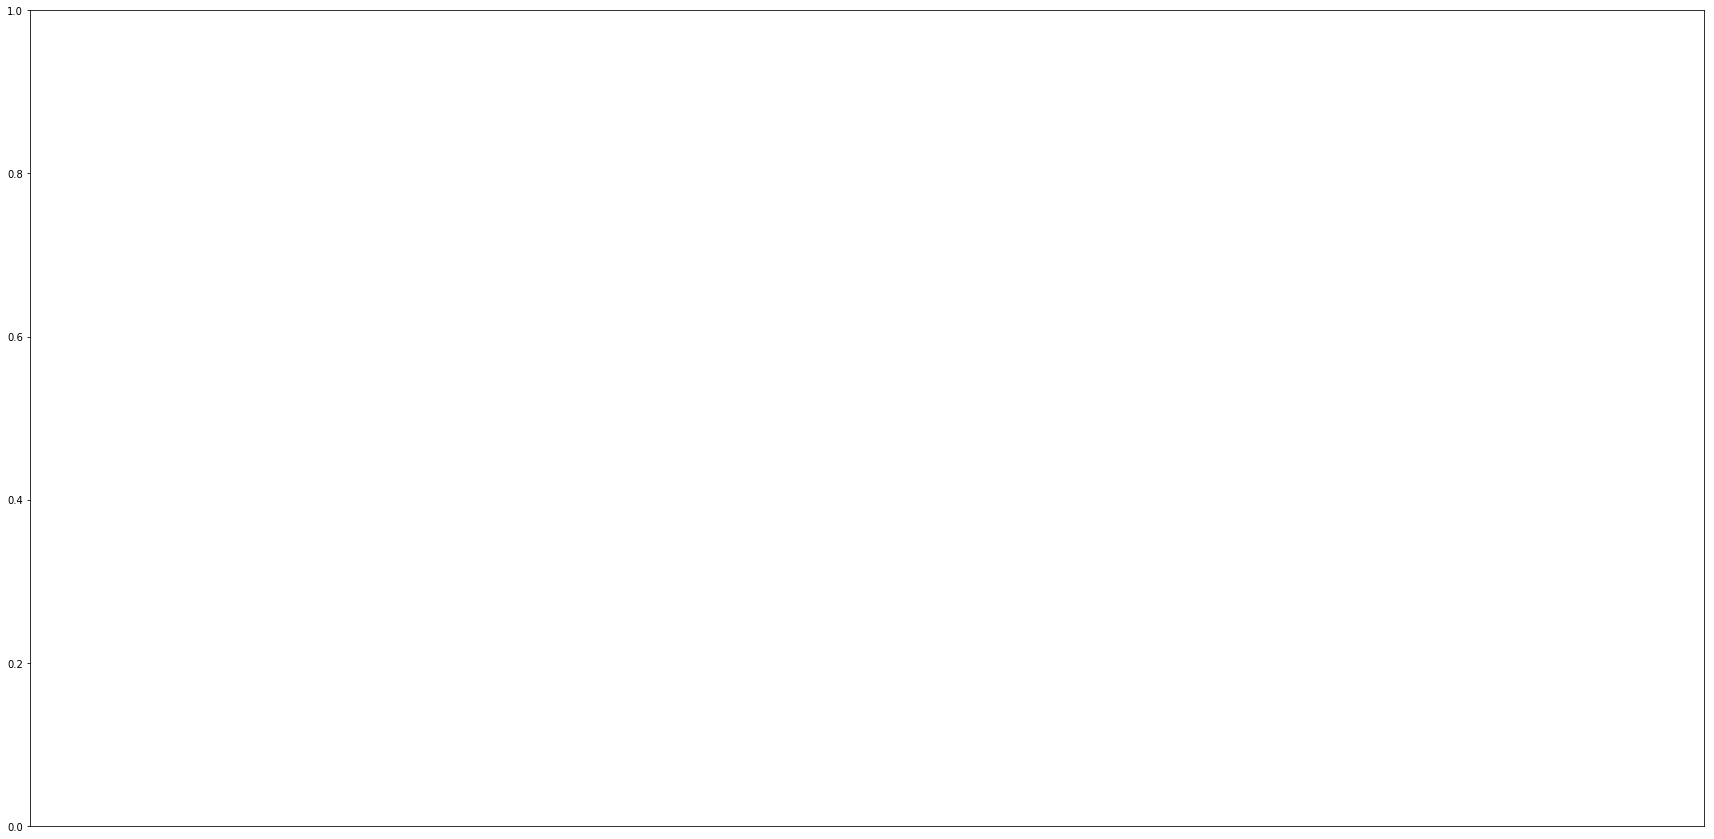

In [49]:
def cumulative_return_GLD_SPLVv2():
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    base_df = pd.DataFrame()
    for year in range(2011, 2020):
        year = str(year)
        # Buy GLD 12/20 / Sell 2-20
        GLD_start_date,GLD_end_date = year + "-12-20", str(int(year)+1) + "-02-20"
        df1 = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        df1['Daily_return']=df1['Close']/df1['Close'].shift(1)-1
        df1["Year"] = year
        #df1["GLD" + year][1:].plot() # skip first line

        SPLV_start_date,SPLV_end_date = year + "-02-20", year + "-08-01"
        df3 = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        df3['Daily_return']=df3['Close']/df3['Close'].shift(1)-1
        df3["Year"] = year
        #df3["SPLV" + year][1:].plot() # skip first line


        GLD_start_date,GLD_end_date = year + "-08-01", year + "-08-31"
        df2 = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        df2['Daily_return']=df2['Close']/df2['Close'].shift(1)-1
        df2["Year"] = year
        #df2["GLD" + year][1:].plot() # skip first line


        SPLV_start_date,SPLV_end_date = year + "-09-01", year + "-12-20"
        df4 = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        df4['Daily_return']= df4['Close'] / df4['Close'].shift(1)-1
        df4["Year"] = year
        #df4["SPLV" + year,"Close"][1:].plot() # skip first line

        base_df = pd.concat([base_df,df1, df3, df2, df4])

    base_df.fillna(value = {'Daily_return': 0}, inplace = True)
    base_df['Cumulative_return'] = np.cumsum([base_df['Daily_return']])
    base_df['Cumulative_return'].plot()

    print(" Cumulative Returns for GLD/SPLV strategy: {} ".format(ret))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)
cumulative_return_GLD_SPLVv2()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/home/ajc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 Cumulative Returns for GLD/SPLV strategy: 0 


Text(0.5, 0.98, 'Cumulative Return')

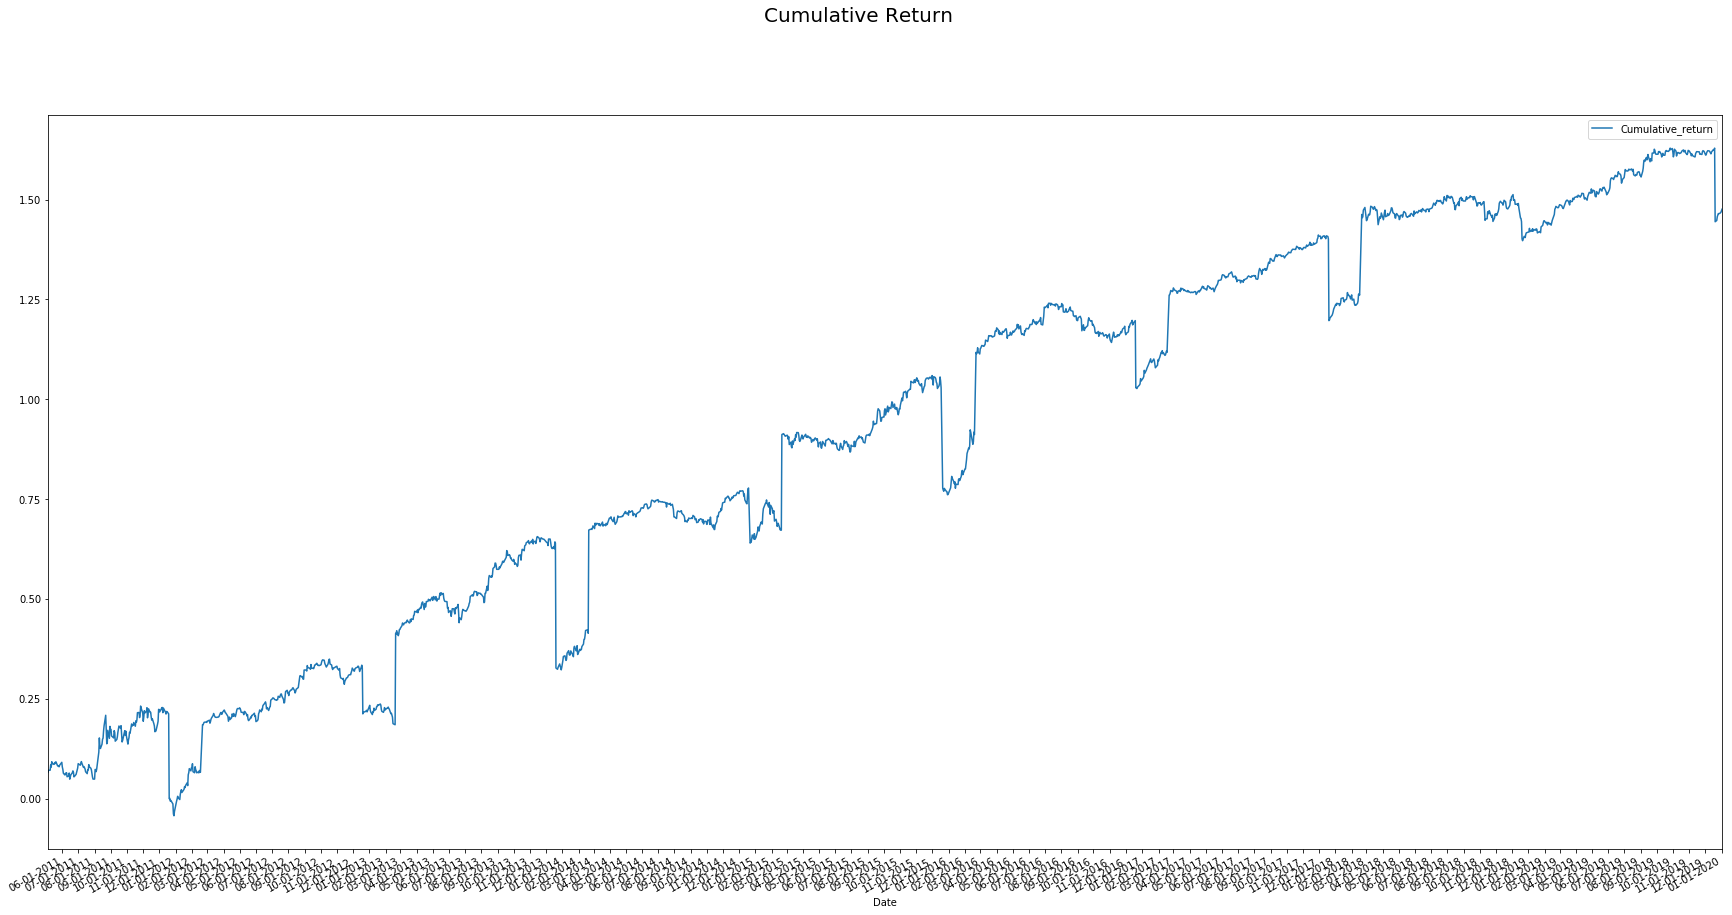

In [153]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
%matplotlib inline
ret = 0
fig, ax = plt.subplots(figsize=(30, 15))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
base_def = pd.DataFrame()
for year in range(2011, 2020):
    year = str(year)
    # Buy GLD 12/20 / Sell 2-20
    GLD_start_date,GLD_end_date = year + "-12-20", str(int(year)+1) + "-02-19"
    df1 = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
    df1['Daily_return']=df1['Close']/df1['Close'].shift(1)-1
    #df1["GLD" + year][1:].plot() # skip first line
    
    SPLV_start_date,SPLV_end_date = year + "-02-20", year + "-07-31"
    df3 = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
    df3['Daily_return']=df3['Close']/df3['Close'].shift(1)-1
    #df3["SPLV" + year][1:].plot() # skip first line
    
    
    GLD_start_date,GLD_end_date = year + "-08-01", year + "-08-31"
    df2 = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
    df2['Daily_return']=df2['Close']/df2['Close'].shift(1)-1
    #df2["GLD" + year][1:].plot() # skip first line


    SPLV_start_date,SPLV_end_date = year + "-09-01", year + "-12-19"
    df4 = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
    df4['Daily_return'] = df4['Close'] / df4['Close'].shift(1)-1
    #df4["SPLV" + year,"Close"][1:].plot() # skip first line

    base_def = pd.concat([base_def,df1, df3, df2, df4])

for i,j in enumerate(base_def['Daily_return']):
    if  pd.isna(base_def['Daily_return'][i]) :
        base_def['Daily_return'][i] = 0
bd_test = base_def
base_def['Cumulative_return'] = np.cumsum(base_def['Daily_return'])
base_def.sort_index(inplace=True)
base_def['Cumulative_return'].plot()

print(" Cumulative Returns for GLD/SPLV strategy: {} ".format(ret))
plt.legend()
plt.suptitle('Cumulative Return', fontsize=20)

In [109]:
base_def.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Daily_return         float64
Cumulative_return    float64
dtype: object

In [152]:
for i,j in enumerate(base_def['Daily_return']):
    if  pd.isna(base_def['Daily_return'][i]) :
        base_def['Daily_return'][i] = 0
base_def[:170].tail(80)

,Open,High,Low,Close,Adj Close,Volume,Daily_return,Cumulative_return
Date,,,,,,,,
2011-09-13,23.580000,23.690001,23.400000,23.650000,19.289253,668400,0.006383,0.154606
2011-09-14,23.680000,24.129999,23.570000,23.920000,19.509480,58400,0.011417,0.166022
2011-09-15,24.040001,24.150000,23.910000,24.129999,19.738523,89400,0.008779,0.174801
2011-09-16,24.270000,24.379999,24.200001,24.299999,19.877586,188500,0.007045,0.181846
2011-09-19,24.170000,24.290001,23.950001,24.160000,19.763073,120000,-0.005761,0.176085
2011-09-20,24.290001,24.590000,24.200001,24.320000,19.893936,105100,0.006623,0.182708
2011-09-21,24.340000,36.560001,23.780001,23.830000,19.493130,180600,-0.020148,0.162560
2011-09-22,23.260000,23.379999,23.090000,23.340000,19.092302,637600,-0.020562,0.141997
2011-09-23,23.290001,23.540001,23.240000,23.430000,19.165905,218200,0.003856,0.145853


In [154]:
bd_test[:170].tail(80)

,Open,High,Low,Close,Adj Close,Volume,Daily_return,Cumulative_return
Date,,,,,,,,
2011-09-13,23.580000,23.690001,23.400000,23.650000,19.289253,668400,0.006383,0.154606
2011-09-14,23.680000,24.129999,23.570000,23.920000,19.509480,58400,0.011417,0.166022
2011-09-15,24.040001,24.150000,23.910000,24.129999,19.738523,89400,0.008779,0.174801
2011-09-16,24.270000,24.379999,24.200001,24.299999,19.877586,188500,0.007045,0.181846
2011-09-19,24.170000,24.290001,23.950001,24.160000,19.763073,120000,-0.005761,0.176085
2011-09-20,24.290001,24.590000,24.200001,24.320000,19.893936,105100,0.006623,0.182708
2011-09-21,24.340000,36.560001,23.780001,23.830000,19.493130,180600,-0.020148,0.162560
2011-09-22,23.260000,23.379999,23.090000,23.340000,19.092302,637600,-0.020562,0.141997
2011-09-23,23.290001,23.540001,23.240000,23.430000,19.165905,218200,0.003856,0.145853


In [100]:
base_def1['Daily_return'][100:200]

Date
2011-09-26    0.018353
2011-09-27    0.005868
2011-09-28   -0.011250
2011-09-29    0.010114
2011-09-30   -0.011264
2011-10-03   -0.021097
2011-10-04    0.010345
2011-10-05    0.005546
2011-10-06    0.013577
2011-10-07   -0.002093
2011-10-10    0.023070
2011-10-11   -0.005330
2011-10-12    0.003298
2011-10-13   -0.001233
2011-10-14    0.006993
2011-10-17   -0.009395
2011-10-18    0.013608
2011-10-19   -0.003662
2011-10-20    0.006125
2011-10-21    0.017857
2011-10-24    0.000399
2011-10-25   -0.012754
2011-10-26    0.006459
2011-10-27    0.022463
2011-10-28   -0.005100
2011-10-31   -0.012618
2011-11-01   -0.020367
2011-11-02    0.011007
2011-11-03    0.015323
2011-11-04   -0.005560
                ...   
2012-01-04    0.005067
2012-01-05    0.006828
2012-01-06   -0.003676
2012-01-09   -0.004453
2012-01-10    0.013674
2012-01-11    0.006493
2012-01-12    0.004447
2012-01-13   -0.006983
2012-01-17    0.007786
2012-01-18    0.006854
2012-01-19   -0.002352
2012-01-20    0.005272
2012-0